# Homework Set 2

In [56]:
%pylab inline
import numpy as np
import pandas as pd
import fmt
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import time
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Problem 1:

Prove the following properties for the matrix norm, where $A, B$ are matrices, $\boldsymbol u$ is a vector and $b$ is a scaler.
$\renewcommand{bs}{\boldsymbol}$
* $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $
* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

#### (1) $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
#### Solution:  I think it should be $\ge$
Since $\Vert I \Vert = \Vert A A^{-1}\Vert \le \Vert A\Vert \; \Vert A^{-1} \Vert$  
Hence $\Vert A ^{-1} \Vert \ge \frac{1}{\Vert A \Vert}= \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert}$


#### (2) $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $

#### Solution: 
$ \Vert A\Vert \; \Vert \boldsymbol u\Vert = \max_{\bs i \ne 0} \frac{\Vert A \bs i \Vert}{\Vert \bs i\Vert} \; \Vert u \Vert \ge \frac{\Vert A \bs u \Vert}{\Vert \bs u\Vert} \; \Vert u \Vert \ge \Vert A \boldsymbol u\Vert$

#### (3) $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
#### Solution: 
Obvious from the definition of norm

#### (4) $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $

#### Solution:
$\Vert A+B \Vert = \max_{\bs i \ne 0} \frac{\Vert (A+B) \bs i \Vert}{\Vert \bs i\Vert} = \max_{\bs i \ne 0} \frac{\Vert A\bs i + B\bs i  \Vert}{\Vert \bs i\Vert} \le \max_{\bs i \ne 0} \frac{\Vert A\bs i \Vert + \Vert B\bs i  \Vert}{\Vert \bs i\Vert} \le \max_{\bs p \ne 0} \frac{\Vert A\bs p \Vert }{\Vert \bs p\Vert} + \max_{\bs q \ne 0} \frac{\Vert B\bs q \Vert }{\Vert \bs q\Vert} = \Vert A\Vert + \Vert B\Vert$
#### (5) $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$
#### Solution:
$\Vert AB \Vert = \max_{\bs i \ne 0} \frac{\Vert AB \bs i \Vert}{\Vert \bs i\Vert} \le \max_{\bs i \ne 0} \frac{\Vert A \Vert\Vert B \bs i \Vert}{\Vert \bs i\Vert} \le \Vert A \Vert \; \Vert B \Vert $

## Problem 2



0. Derive the analytical expression of Cholesky decomposition of a 2 dimensional correlation matrix 
$\left(\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right)$, this result is worth memorizing.
1. Implement the recursive Cholesky decomposition algorithm discussed in the class in Python, with the following requirements:
 - use vector/matrix calculation whenever possible, but you obviously should not just call the buildin numpy/scipy functions for Cholesky decomposition 
 - detect and throw exception if the input matrix is not semi-positive definite
3. test your program against the version provided in scipy.linalg, and compare their performance

Hint: for #2, if you don't know what conditoin to catch, you can create a non-SPD matrix and observe how your program can fail. 

## Solution:
#### 1.
Let $ \left[\begin{array} \\ a & 0 \\ b & c \end{array} \right] \left[\begin{array} \\ a & b \\ 0 & c \end{array} \right]= \left[\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right]$  

We got :  
$a = 1, b = \rho, c = \sqrt{1-\rho^{2}}$  

i.e.  
$\left[ \begin{array} \\ 1 & \rho \\ \rho & 1 \end{array}\right] = \left[ \begin{array} \\ 1 & 0 \\ \rho & \sqrt{1-\rho^{2}} \end{array}\right]  \left[ \begin{array} \\ 1 & \rho \\ 0 & \sqrt{1-\rho^{2}} \end{array}\right]$

#### 2.

In [2]:
from numpy.random import random_sample
from numpy.linalg import cholesky

In [10]:
def cholesky_dec(A):
    
    if A[0, 0] < 0:
        raise ValueError("The input matrix is not semi-positive definite")
    
    if len(A) == 1:
        return np.sqrt(A)
    L_11 = np.sqrt(A[0, 0])
    L_21 = A[1:, :1] / L_11
    L_22_tmp = A[1:, 1:] - L_21.dot(L_21.T)

    return np.vstack((np.hstack((L_11, np.zeros(L_21.shape[0]))),
                 np.hstack((L_21, cholesky_dec(L_22_tmp)))))

#### 3

#### Correctness:

In [4]:
def correctness_test():
    dim = np.arange(1, 500, 20)
    for i in tqdm(dim):
        A = random_sample((i, i))
        A = A.dot(A.T)
        a = cholesky_dec(A)
        b = cholesky(A)
        if not np.allclose(cholesky_dec(A), cholesky(A)):
            print "Different result detected"
            return
    print "Results in accordance."

correctness_test()

Results in accordance.


#### Performance:

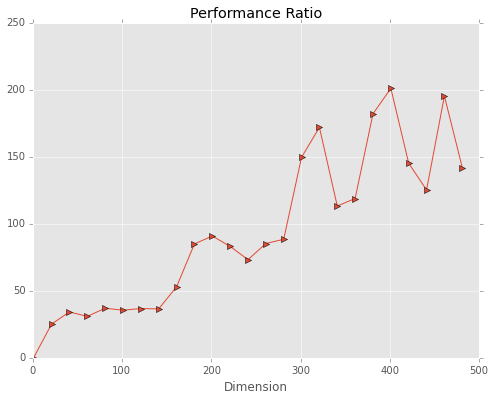

In [57]:
dim = np.arange(1, 500, 20)
ratio_list = []
for i in tqdm(dim):
    A = random_sample((i, i))
    A = A.dot(A.T)
    start1 = time.time()
    cholesky_dec(A)
    end1 = time.time()
    start2 = time.time()
    cholesky(A)
    end2 = time.time()
    ratio = (end1 - start1) / (end2 - start2)
    ratio_list.append(ratio)
plt.figure(1, figsize=(8,6))
plt.plot(dim, ratio_list, '->')
plt.title('Performance Ratio')
plt.xlabel("Dimension")
plt.grid(True)
plt.show()

## Problem 3

Take the portfolio and historical stock time series of the Dow Jones industrial average (DJIA) index:

In [7]:
djiaurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djia.csv"
djia = pd.read_csv(djiaurl, index_col=[0])

fmt.displayDF(djia)

,Name,Sector,Weights
Ticker,,,
MMM,3M Co.,Diversified Industrials,0.0539
AXP,American Express Co.,Consumer Finance,0.0324
T,AT&T Inc.,Fixed Line Telecommunications,0.0134
BA,Boeing Co.,Aerospace/Defense Products & Services,0.0483
CAT,Caterpillar Inc.,Commercial Vehicles & Trucks,0.0373
CVX,Chevron Corp.,Integrated Oil & Gas,0.0438
CSCO,"Cisco Systems, Inc",Networking & Communication,0.0091
KO,Coca-Cola Co.,Soft Drinks,0.0168
DD,E.I. DuPont de Nemours & Co.,Commodity Chemicals,0.0263


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)


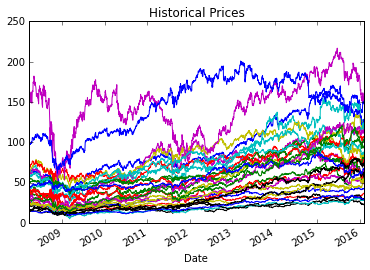

In [9]:
def download_hist_prices(tickers) : # we download the stock prices from Yahoo!Finance
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    closeKey = 'Adj Close'
    dfs = []

    for ticker in tqdm(tickers):
        try :
            url = base_url + ticker
            dfs.append(pd.read_csv(url, parse_dates=[0], index_col=[0]).rename(columns={closeKey:ticker})[ticker])
        except Error:
            print "error in " + ticker
            continue

    return pd.concat(dfs, axis=1, join='inner')

histprice = download_hist_prices(djia.index).sort()
histprice.plot(legend=False, title='Historical Prices');

1. estimate the historical correlation and covariance matrix of the DJIA constiuents' daily returns, 
2. estimate historical excess return of individual stocks (assume the historical risk free rate is 3%)
3. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
4. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
5. compute the condition number of the covariance matrix, and comments the numerical stability of the optimal portfolio. You can use the python function ```numpy.linalg.norm``` for matrix norm.
2. take the daily return time series, and split them into two segments: one only contains odd days' returns and the other only contains even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segements, and compare their results. Please comment on which of the two metric, return or volatility, can be reliably estimated from historical data. 
6. [Extra credit] Please repeat the analysis using weekly returns and comment on whether the results are materially different
6. [Extra credit]: use numerical simulation to show that the optimal portfolio from #3 indeed has the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. ```numpy.random``` is a random number generator package in Python.
7. [Extra credit, open question] comment on what practical implication you might infer from the results in 8.

Hints and requirements: 
* as discussed in class, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into singular matrix when reverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and he doesn't understand what is a singular matrix that can't be inverted).
* on part 5, you can use array slice to split btw even and odd elements, see the following example:

## Solution:
#### 1.

In [45]:
log_price = histprice.apply(np.log)
hist_ret = log_price.diff()[1:] * 250
hist_cov = hist_ret.cov()
hist_corr = hist_ret.corr()

In [ ]:
hist_cov

In [ ]:
hist_corr

#### 2.

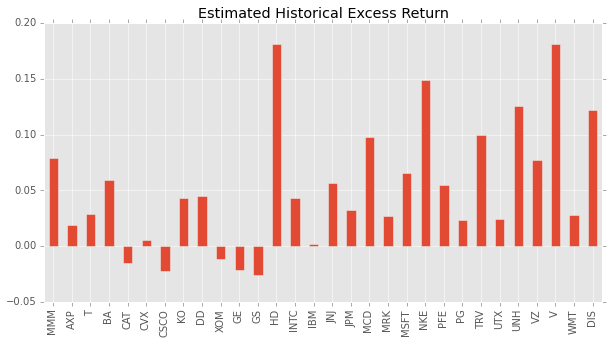

In [120]:
r0 = 0.03
excess_ret = np.mean(hist_ret) - r0
excess_ret.plot(kind='bar', figsize=(10, 5), title="Estimated Historical Excess Return");

#### 3.

In [60]:
from numpy.linalg import inv

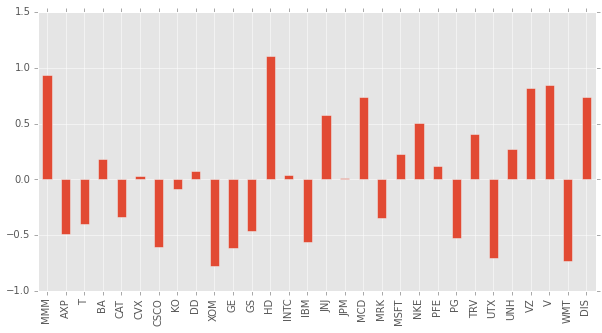

In [127]:
cov_inv = inv(hist_cov)
w = cov_inv.dot(excess_ret.T)/(excess_ret.T.dot(cov_inv).dot(excess_ret))
w = pd.Series(w, index=excess_ret.index)
w = w/np.sum(w)
w.plot(kind="bar", figsize=(10, 5))
#w.sort_values().plot(kind="barh", figsize=(5, 10))
#w.sort_values(ascending=False, inplace=False).plot(kind='bar');

#### 4.

#### 5.

#### 6.

#### 7.

####  8.

#### 9.

In [3]:
whole = np.arange(1, 10)
print "whole = ", whole
odd = whole[0::2]
even = whole[1::2]
print "even = ", even
print "odd = ", odd

whole =  [1 2 3 4 5 6 7 8 9]
even =  [2 4 6 8]
odd =  [1 3 5 7 9]
